### Author: Sidharth Ramanan
### Date: 04/25/22

# Welcome to Google Colaboratory

Hi class, welcome to Google Colaboratory. If you're unfamiliar with Google Colaboratory, it's a handy tool to run and share notebooks on the cloud (meaning you don't need to worry about setting up an environment locally for Jupyter)

A notebook is just a collection of cell outputs. Each cell consists of either  snippets of code (with their outputs) or some text to annotate/describe what you're doing. 

Notebooks are convenient for interactively experimenting with your data and ML models. Typically, you want to use your notebooks to tell the reader a story:

1.  What data problem am I trying to solve?
2.  What data am I working with? 
3.  What are some effective ways I can visualize the data to understand what's going on? 
4.  How am I preprocessing that data? Why do those decisions make sense? For example:
  *   Am I normalizing or standardizing any features?
  *   Am I eliminating some features? (dimesionality reduction)
5.  What models am I going to experiment with? 
6.  How are those models performing?
7.  Back to the big picture: how can I connect my model's results to the data problem I'm trying to solve? 

The more you work with notebooks, the more you will get the hang of this workflow. 

# Goal of the notebook

In this notebook, I'm demonstrating how to build regression models using a popular Python library called scikit learn. I'll cover:

1.   Linear regression to fit a linear function
2.   Linear regression to fit a polynomial function
3.   Multiple linear regression on multiple features

To play around with this notebook (editing it, etc) go to `File` -> `Save a copy in Drive` and you'll have your own version to modify

This cell imports the libraries we'll be using in this notebook

In [ ]:
import numpy as np #used for processing vectors of data
import matplotlib.pyplot as plt #used for visualizing data
import sklearn #library with ML code
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score #regression metric functions

We define a function that takes ground truth values and prediction values and calculates some regression metrics we learned in class

In [ ]:
def evaluationMetrics(y_test, y_pred):
  print("Coefficient of Determination (R^2): ", r2_score(y_test, y_pred))
  print("MAE: ", mean_absolute_error(y_test, y_pred))
  print("MSE: ", mean_squared_error(y_test, y_pred))

In all of the examples that follow, I'm artificially creating the datasets out of an underlying function that I decide on. This is for pedagogical purposes. Remember that in the real-world you will not know the underlying function! You will only have the data

# Linear regression for a linear function

In [ ]:
from sklearn.datasets import make_regression

In [ ]:
X, y, coef = make_regression(n_samples=100, n_features=1, n_informative=1, coef=True)
print(X.shape)
print(y.shape)
print(X[:5]) #print the first 5 feature instances (inputs)
print(y[:5]) #print the first 5 labels (the corresponding outputs of the inputs)

(100, 1)
(100,)
[[ 0.52163582]
 [ 0.17510787]
 [ 0.13420398]
 [-0.65786843]
 [ 0.47201699]]
[ 4.49734335  1.50971271  1.15705507 -5.67188855  4.06954896]


It's very useful to print the `.shape` s of your data so you know how many rows, columns, etc of data you're dealing with. For example, `X` has 100 rows of 1 column (1 feature). y is a 1D array with 100 values 

In [ ]:
noise = np.random.normal(0, .5, y.shape[0]) #100 random noise values between 0 and 0.5
noise.shape

(100,)

`y` and `noise` have special numpy vector data types, meaning you can just add them like normal numbers and this will perform vector style addition (adding parallel entries)

In [ ]:
y = y + noise

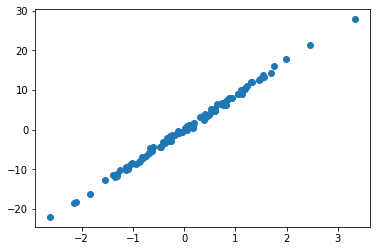

In [ ]:
plt.scatter(X, y)

If you recall, when we're about to build a machine learning model on our data, we divide our data into a training set and a test set. The training set is for the model to apply its algorithm on, and the test set is for evaluating the model's performance

The `train_test_split` function helps us do this

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((70, 1), (30, 1), (70,), (30,))

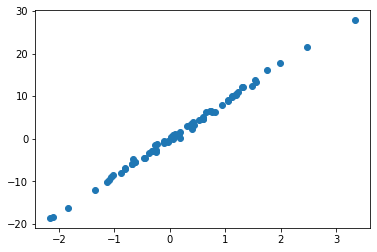

In [ ]:
plt.scatter(X_train, y_train)

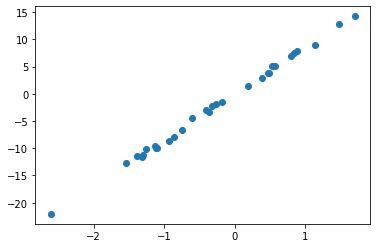

In [ ]:
plt.scatter(X_test, y_test)

Now, we build our Linear Regression model

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linear_model = LinearRegression() #instantiate a LinearRegression model
linear_model = linear_model.fit(X_train, y_train) #Will apply the algorithm on the training data

The model has finished training, so we can start predicting on test data

In [ ]:
y_pred = linear_model.predict(X_test)

We can use the model to evaluate points on the line of best fit it learned for the training data, and then plot this

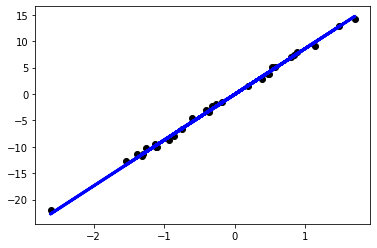

In [ ]:
plt.scatter(X_test, y_test, color="black")
plt.plot(X_test, y_pred, color="blue", linewidth=3)

In [ ]:
evaluationMetrics(y_test, y_pred)

Coefficient of Determination (R^2):  0.9969854952589229
MAE:  0.403680153053652
MSE:  0.2237334455459411


# Linear regression for a polynomial function

Here, we create an artificial polynomial (degree 3) function on 20 values in the range (-10, 10) 

We do this by calculating x, x^2, and x^3 for all of these 20 values and storing them in a matrix (2D array). We can treat these as 3 new features and we want to learn a coefficient for each of the 3. We also include a 1 as the first entry to implicitly learn a coefficient for the bias (constant) term



In [ ]:
from sklearn.preprocessing import PolynomialFeatures
inputs = np.arange(-10, 10).reshape(20, 1)
poly = PolynomialFeatures(3)
X = poly.fit_transform(inputs)
print(X)
print(X.shape)

[[    1.   -10.   100. -1000.]
 [    1.    -9.    81.  -729.]
 [    1.    -8.    64.  -512.]
 [    1.    -7.    49.  -343.]
 [    1.    -6.    36.  -216.]
 [    1.    -5.    25.  -125.]
 [    1.    -4.    16.   -64.]
 [    1.    -3.     9.   -27.]
 [    1.    -2.     4.    -8.]
 [    1.    -1.     1.    -1.]
 [    1.     0.     0.     0.]
 [    1.     1.     1.     1.]
 [    1.     2.     4.     8.]
 [    1.     3.     9.    27.]
 [    1.     4.    16.    64.]
 [    1.     5.    25.   125.]
 [    1.     6.    36.   216.]
 [    1.     7.    49.   343.]
 [    1.     8.    64.   512.]
 [    1.     9.    81.   729.]]
(20, 4)


Notice the 1, x, x^2, and x^3 pattern across the rows

Since I'm artificially creating this dataset, I'm using an arbitrary ground truth function defined by a set of coefficients. Remember, typically you wouldn't know these coefficients. But for pedagogical purposes, we want our regression algorithm to be learning these coefficients

In [ ]:
ground_truth_coefficients = [0.1, 0.5, -0.3, 0.2]
y = np.dot(X, np.array(ground_truth_coefficients)) #calculates y = 0.1*1 + 0.5*x -0.3*x^2 + 0.2*x^3 for all the datapoints

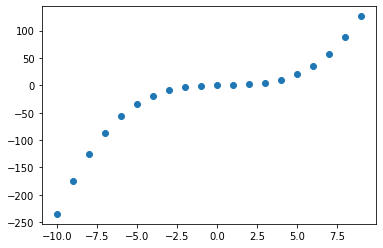

In [ ]:
plt.scatter(inputs, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14, 4), (6, 4), (14,), (6,))

In [ ]:
linear_model = LinearRegression(fit_intercept=False) #fit_intercept=False because we're implicitly including the bias term already
linear_model = linear_model.fit(X_train, y_train)

In [ ]:
y_pred = linear_model.predict(X_test)

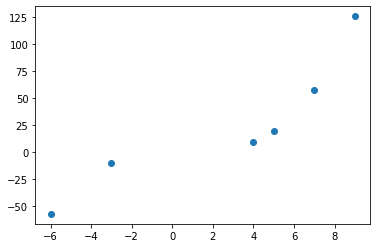

In [ ]:
plt.scatter(X_test[:, 1], y_test) 
'''
X_test[:, 1] is a 2D indexing that takes all rows of X_test and only the first column. 
The columns go [1, x, x^2, x^3] and we want the second column (index 1) representing the value of x on the x-axis 
'''

After the model has been trained, the model object stores information relating to the function it learned. This includes the coefficients and the bias. Let's print those out:

In [ ]:
linear_model.coef_, linear_model.intercept_

(array([ 0.1,  0.5, -0.3,  0.2]), 0.0)

These exactly match the coefficients from the underlying function, so the algorithm has done a good job (though to be fair, it got perfect data)

`linear_model.coef_` is like the `w` weight vector, and `linear_model.intercept_` is like the `b` bias term in `w . x + b = 0` describing the fitted hyperplane

We can plot the polynomial it learns as follows:

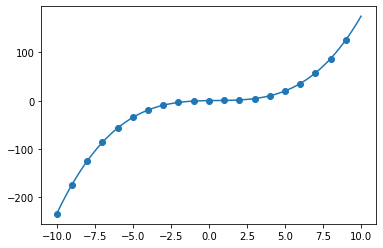

In [ ]:
curve = np.array(linear_model.coef_)
xs = np.linspace(-10,10,100)
ys = [np.dot(linear_model.coef_, [1, x, x**2, x**3]) for x in xs]
plt.scatter(X[:, 1], y)
plt.plot(xs,ys)

In [ ]:
evaluationMetrics(y_test, y_pred)

Coefficient of Determination (R^2):  1.0
MAE:  4.2762090165145615e-14
MSE:  2.5795936490001747e-27


# Multiple linear regression

The previous example was actually just multiple linear regression with polynomial features `(1, x, x^2, x^3)`

This example assumes there are actually multiple independent variables representing different input features (the previous example had just one input feature, x)

In [ ]:
X, _ = make_regression(n_samples=100, n_features=2, n_informative=3, coef=False)
print(X.shape)
X[:5]

(100, 2)


array([[-1.09689032,  1.92722429],
       [ 0.7677308 , -0.45207277],
       [-0.70648706, -0.31389412],
       [-1.5491492 ,  0.75546134],
       [-1.59843554, -2.48558554]])

In [ ]:
ground_truth_coefficients = [1.5, 2.1] #ground truth weights for x1, x2
bias = 5.0 #ground truth bias
y = np.dot(X, np.array(ground_truth_coefficients)) + bias #create ground truth values artificially

We can plot the 2 feature inputs and the output value in a 3D plot. (When you have more than 2 features, visualization becomes harder of course)

In [ ]:
import plotly.express as px
fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=y) #X[: 0] are all the x1 values, X[:, 1] are all the x2 values
fig.show()

Play around with this plot. Notice how all the points seem to lie on one linear plane?

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
linear_model = LinearRegression()
linear_model = linear_model.fit(X_train, y_train)

In [ ]:
y_pred = linear_model.predict(X_test)

We can a function called `np.allclose` to compare the outputs of the predictions and the ground truth values. We do it this way versus an `==` check because we're dealing with float values which have precision issues

In [ ]:
np.allclose(y_pred, y_test) 

True

This effectively means all values are basically equal, meaning the model had perfect predictions (again, it had the advantage of being trained on perfect data) See a few comparisons:

In [ ]:
y_pred[:5], y_test[:5]

(array([3.38345065, 8.31267225, 7.99331784, 3.06087411, 2.71951144]),
 array([3.38345065, 8.31267225, 7.99331784, 3.06087411, 2.71951144]))

We can plot the hyperplane that it learned as well! This is done by evaluating the learned hyperplane along a 2D mesh of points and plotting that surface 

In [ ]:
#Credits: https://linuxtut.com/en/e42c726cdee25767105d/

import plotly.graph_objects as go

mesh_size = .02
x_min, x_max = X.min(), X.max()
y_min, y_max = X.min(), X.max()
xrange = np.arange(x_min, x_max, mesh_size)
yrange = np.arange(y_min, y_max, mesh_size)
xx, yy = np.meshgrid(xrange, yrange)

#Predict for all points on the mesh
pred = linear_model.predict(np.c_[xx.ravel(), yy.ravel()])
pred = pred.reshape(xx.shape)

fig = px.scatter_3d(x=X[:, 0], y=X[:, 1], z=y)
fig.add_traces(go.Surface(x=xrange, y=yrange, z=pred, name='pred_surface'))
fig.show()

In [ ]:
evaluationMetrics(y_test, y_pred)

Coefficient of Determination (R^2):  1.0
MAE:  1.0362081563168128e-15
MSE:  1.4462449929051883e-30


That wraps up this notebook - hope it was helpful. Feel free to explore the APIs of scikit learn to play around with different models! I also recommend creating playground notebooks if you want to just familiarize yourself more with libraries like numpy, pandas, matplotlib, etc if you're new to them. It all comes with practice!